# Newton-Raphson Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plot of the function

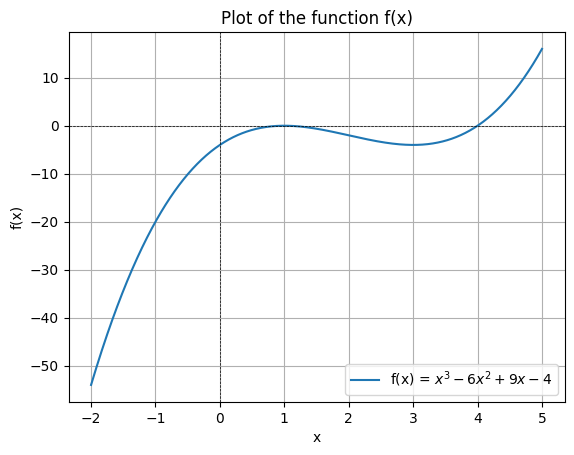

In [2]:
# f(x) = x^3 - 6*x^2 + 9*x - 4 = 0

def f(x):
    return x**3 - 6*x**2 + 9*x - 4


x = np.linspace(-2,5, 1000)
y = f(x)

plt.plot(x, y, label='f(x) = $x^3 - 6x^2 + 9x - 4$')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title('Plot of the function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

## Newton-Raphson General Relations

$$ \Delta c^{(k)} = c - f(x^{(k)})  --> Residual $$
$$ \Delta x^{(k)} = \Delta c^{(k)} / (df/dx)^{(k)}  --> Correction $$
$$ x^{(k+1)} = x^{(k)} + \Delta x^{(k)}  --> Update $$


In [6]:
# now lets program f(x) = c to find root for c = 0

# function which we want to find root for
def f(x):
    return x**3 - 6*x**2 + 9*x - 4

# initial guess
x0 = 2.2

# target value
c = 0.0   

# tolerance for convergence
tolerance = 1e-3

# maximum number of iterations
max_iterations = 100

def newton_raphson(f, x0, c, tolerance, max_iterations):
    
    x = x0
    
    for iteration in range(max_iterations):
        fx = f(x)
        
        # lets calculate residual
        delta_c = c - fx  # Residual
        
        # lets calculate derivative using finite difference
        h = 1e-8
        dfdx = (f(x + h) - f(x - h)) / (2 * h)
        
        # lets clculate corection
        delta_x = delta_c / dfdx  # Correction
        
        # update x
        x = x + delta_x  # Update
        
        # check for convergence
        if abs(delta_c) < tolerance:
            print(f"Converged in {iteration} iterations.")
            return (x, True)
        
        if dfdx == 0:
            print("Derivative is zero. No solution found.")
            return None
        elif iteration == max_iterations - 1:
            print("Maximum iterations reached. No solution found.")
            return None
        # lets print iteration details(iteration, residual, df/dx, correction, new x)
        print(f"Iteration {iteration+1}: Residual = {delta_c}, df/dx = {dfdx}, Correction = {delta_x}, New x = {x}")
        
    return (x, False)


root, converged = newton_raphson(f, x0, c, tolerance, max_iterations)

if converged:
    print(f"Root found: x = {root}, f(x) = {f(root)}")
        
        

Iteration 1: Residual = 2.5920000000000023, df/dx = -2.8800000606565845, Correction = -0.8999999810448185, New x = 1.3000000189551817
Iteration 2: Residual = 0.24300002900142914, df/dx = -1.5300001265927676, Correction = -0.15882353522582893, New x = 1.1411764837293528
Iteration 3: Residual = 0.05697863847501239, df/dx = -0.787266474233661, Correction = -0.07237528885054631, New x = 1.0688011948788065
Iteration 4: Residual = 0.01387513561029774, df/dx = -0.39860634792887595, Correction = -0.03480911852606398, New x = 1.0339920763527426
Iteration 5: Residual = 0.003427107237117255, df/dx = -0.2004860721882551, Correction = -0.01709399161603218, New x = 1.0168980847367104
Converged in 5 iterations.
Root found: x = 1.0084250459630768, f(x) = -0.00021234617688747903


## Newton-Raphson on system of equations with 2 variables